

---

## 🔍 **What is a Vision-Language Model (VLM)?**

---

### 🧠 **Definition:**

A **Vision-Language Model (VLM)** is a type of deep learning model that can:
> Understand both **visual information (images)** and **textual information (language)** and **connect** them in a meaningful way.

These models are trained to **jointly learn from images and text**, so they can perform tasks like:
- Image captioning
- Visual question answering (VQA)
- Object detection with text prompts (Open Vocabulary Detection)
- Phrase grounding
- Referring expression segmentation
- OCR and more

---

### 🤝 **Why combine vision + language?**

In the real world, we don’t just see — we **talk about what we see**. Vision-Language Models aim to teach machines to do the same.

Examples:
- Given an image, generate a description (Image Captioning)
- Given a sentence, find the matching object (Phrase Grounding)
- Given a question about an image, answer it (VQA)

---

## ⚙️ **How does a Vision-Language Model work?**

---

### 🔧 Main Components:

| Component | Purpose |
|----------|---------|
| **Image Encoder (CNN or ViT)** | Converts the image into a set of features or embeddings |
| **Text Encoder (like BERT)** | Converts a sentence or word into text embeddings |
| **Cross-modal Attention** | Helps the model relate **words** to **visual regions** |
| **Decoder / Task Head** | Performs the final task (e.g., generate caption, segment object) |

---

### 🧠 Simple Architecture View:

```
[Image] ──▶ [Visual Encoder] ─────┐
                                 │
                                 ▼
                              [Cross-Modal Fusion] ──▶ [Task Output]
                                 ▲
                                 │
[Text] ──▶ [Text Encoder] ───────┘
```

---

### 🧠 Attention in VLMs:

Just like your students learned attention over images (in visual tasks), VLMs use **cross-modal attention**:
- Image regions ↔ Words
- Focuses on “what part of the image relates to which word?”

---

## 📚 **Examples of Vision-Language Models:**

| Model | Known For |
|-------|-----------|
| **CLIP (OpenAI)** | Matching images and text via similarity |
| **BLIP / BLIP-2** | Versatile multimodal tasks |
| **Florence / Florence 2** | Unified vision-language foundation model |
| **Flamingo / PaLI** | Multimodal generation tasks (e.g., VQA, captioning) |
| **GIT / OFA / VILT** | Compact models for multiple tasks |

---

## 🔍 **Why Are They Powerful?**

- Learn from **huge datasets** of image-text pairs (e.g., “A cat sitting on a sofa”)
- Can generalize to **new tasks** with little training (zero-shot or few-shot)
- Great for **open-world reasoning**, not just fixed-label detection

---

## ✅ **Final Summary:**

> A **Vision-Language Model** is a deep learning model that processes and understands **images and natural language together**, allowing it to perform intelligent tasks that require **both seeing and reading**. It uses encoders, attention mechanisms, and task-specific heads to connect words with pixels.

---


## Setup

### Configure your API keys

To run Florence-2, you need to provide your HuggingFace Token. Follow these steps:

- Open your [`HuggingFace Settings`](https://huggingface.co/settings) page. Click `Access Tokens` then `New Token` to generate new token.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store HuggingFace Access Token under the name `HF_TOKEN`.

### Select the runtime

    Step 1: Check for GPU availability
    This helps verify if the Colab environment has a GPU to speed up model inference

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `T4 GPU`, and then click `Save`.


In [ ]:
!nvidia-smi

Wed Jul  3 11:47:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Install extra dependencies

    Step 2: Install required libraries
    - transformers: for pre-trained vision-language models
    - flash_attn: faster attention computation (used in Florence)
    - timm: PyTorch image models (used in Florence's backbone)
    - einops: for tensor reshaping (simplifies image manipulation)
    - supervision: for visualizing results like bounding boxes or masks

 Let's download the model checkpoint and configure it so that you can fine-tune it later on.

In [ ]:
!pip install -q transformers flash_attn timm einops supervision==0.22.0rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 34.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.9/126.9 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 69.9 MB/s eta 0:00:00


### Download example data

    Step 3: Set up environment path

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME) # This prints the working directory where files are stored

HOME: /content


**NONE:** Let's download few example images. Feel free to use your images or videos.

    Step 4: Download example images for inference
    These images will be used for testing different vision tasks

In [ ]:
!mkdir -p {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg -P {HOME}/data
!wget -q https://media.roboflow.com/inference/license_plate_1.jpg -P {HOME}/data
!wget -q https://media.roboflow.com/notebooks/examples/handwritten-text.jpg -P {HOME}/data

## Load pre-trained Florence-2 model

    Step 5: Load Florence 2 Model and Processor

Load the model using `AutoModelForCausalLM` and the processor using `AutoProcessor` classes from the transformers library. Note that you need to pass `trust_remote_code` as `True` since this model is not a standard transformers model.

    Florence 2 is a vision-language model developed by Microsoft
    It follows an encoder-decoder structure:
    - Encoder: processes image into embeddings (like CNN or ViT)
    - Decoder: generates text based on prompt + image features


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoProcessor

#Here, we're using the "large" variant (more accurate)

# CHECKPOINT = "microsoft/Florence-2-base-ft"
CHECKPOINT = "microsoft/Florence-2-large-ft"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model weights and processor (handles image + prompt tokenization)
model = AutoModelForCausalLM.from_pretrained(CHECKPOINT, trust_remote_code=True).to(DEVICE)
processor = AutoProcessor.from_pretrained(CHECKPOINT, trust_remote_code=True)

config.json:   0%|          | 0.00/2.44k [00:00<?, ?B/s]

configuration_florence2.py:   0%|          | 0.00/15.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- configuration_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_florence2.py:   0%|          | 0.00/127k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- modeling_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/1.54G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

processing_florence2.py:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Florence-2-large-ft:
- processing_florence2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer_config.json:   0%|          | 0.00/34.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.10M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Run inference with pre-trained Florence-2 model

    Task1: Object Detection Inference means:
          Predicting the position and category of each object in a new image using a pre-trained detection model.

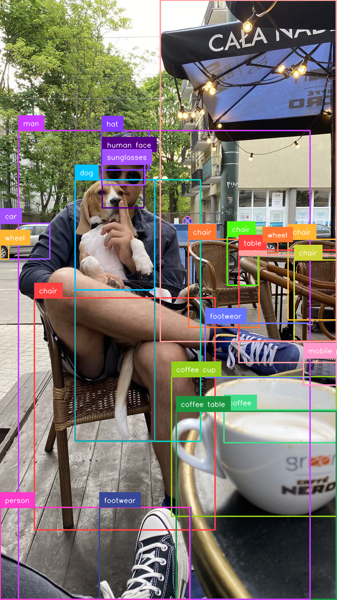

In [ ]:
# @title Example object detection (`<OB>`) inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
text = "<OD>"
task = "<OD>"

inputs = processor(text=text, images=image, return_tensors="pt").to(DEVICE)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3
)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
response = processor.post_process_generation(generated_text, task=task, image_size=image.size)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

    Step 6: Define a helper function for running inference

**NOTE:** Note that out of the box Florence-2 detects far more classes than the typical model pretreated on the COCO dataset.

In [ ]:
 # @title Wrap inference code into utility function

def run_inference(image: Image, task: str, text: str = ""):
    prompt = task + text
    inputs = processor(text=prompt, images=image, return_tensors="pt").to(DEVICE)
    generated_ids = model.generate(
        input_ids=inputs["input_ids"],
        pixel_values=inputs["pixel_values"],
        max_new_tokens=1024,
        num_beams=3
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
    return processor.post_process_generation(generated_text, task=task, image_size=image.size)

    Task2: Image Captioning
     Definition:
        Image captioning is the task of generating a natural language description of an image.
            It’s a classic encoder-decoder problem, where:
            The encoder extracts features from the image (CNN or Vision Transformer).
            The decoder generates words one by one using attention on those features.

     Florence Analogy:
        Florence 2 takes in an image and a prompt like "What is in the image?", uses a visual encoder to understand the content, and a text decoder to produce a caption.

            Example output: “A dog sitting in the grass.”

**NOTE:** Florence-2 offers 3 types of imag caption tasks - `<CAPTION>`, `<DETAILED_CAPTION>`, `<MORE_DETAILED_CAPTION>` differing in level of detail. Let's compare the results obtained.

In [ ]:
# @title Example `<CAPTION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<CAPTION>"

response = run_inference(image=image, task=task)
response

{'<CAPTION>': 'A man sitting in a chair holding a dog.'}

In [ ]:
# @title Example `<DETAILED_CAPTION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<DETAILED_CAPTION>"

response = run_inference(image=image, task=task)
response

{'<DETAILED_CAPTION>': 'In this image I can see a person sitting on the chair and holding a dog. There is a cup and a mobile on the table. There are chairs and tables. At the back there is a building and there are trees.'}

In [ ]:
# @title Example `<MORE_DETAILED_CAPTION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<MORE_DETAILED_CAPTION>"

response = run_inference(image=image, task=task)
response

{'<MORE_DETAILED_CAPTION>': 'A man is sitting outside on a wicker chair. He is wearing a black cap, sunglasses and a blue shirt. The man is holding a brown and white dog in his lap. There is a black table in front of the man with a white coffee cup on it. Part of a building can be seen behind the man. Large green trees are standing on the side of the building.'}

    Task3: Caption to phrase grounding
        It is a vision-language task where the model:
          Finds where a specific phrase (from a caption) is located in the image.

In this image I can see a person sitting on the chair and holding a dog. There is a cup and a mobile on the table. There are chairs and tables. At the back there is a building and there are trees.


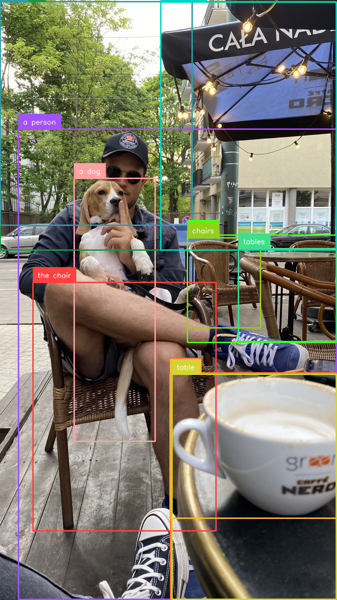

In [ ]:
# @title Example `<DETAILED_CAPTION>` + `<CAPTION_TO_PHRASE_GROUNDING>` combo inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<DETAILED_CAPTION>"

response = run_inference(image=image, task=task)
text = response[task]

task = "<CAPTION_TO_PHRASE_GROUNDING>"

response = run_inference(image=image, task=task, text=text)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))

print(text)
image

    Task4: Open Vocabulary Detection
        It is the task of detecting and labeling objects in an image without being limited to a fixed set of class labels.

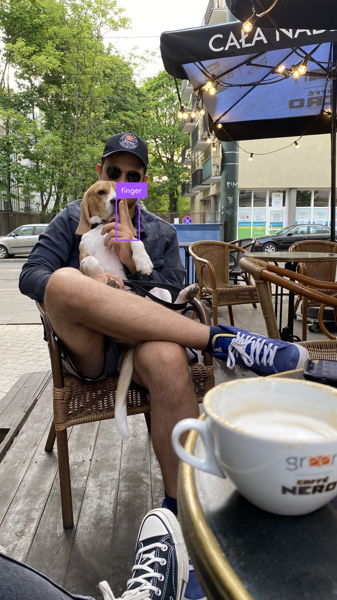

In [ ]:
# @title Example `<OPEN_VOCABULARY_DETECTION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<OPEN_VOCABULARY_DETECTION>"
text = "finger"

response = run_inference(image=image, task=task, text=text)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

    Task5: Dense Region Captioning:
        Generates multiple detailed captions, each describing a specific region of the image.

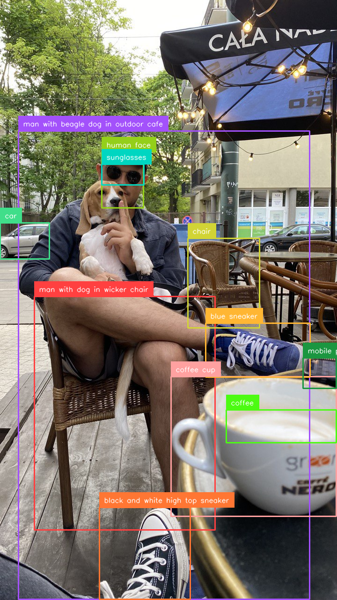

In [ ]:
# @title Example `<DENSE_REGION_CAPTION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<DENSE_REGION_CAPTION>"

response = run_inference(image=image, task=task)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

    Task 6: OCR (Optical Character Recognition)
        It is the task where a model detects and reads text from an image.

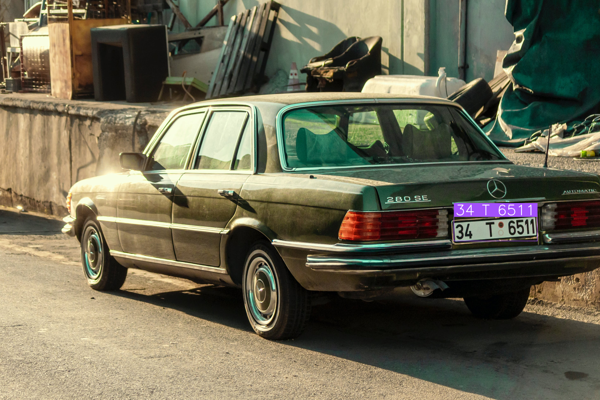

In [ ]:
# @title Example `<OCR_WITH_REGION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/license_plate_1.jpg")
task = "<OCR_WITH_REGION>"

response = run_inference(image=image, task=task)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(
    color_lookup=sv.ColorLookup.INDEX,
    text_scale=3,
    text_thickness=4
)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

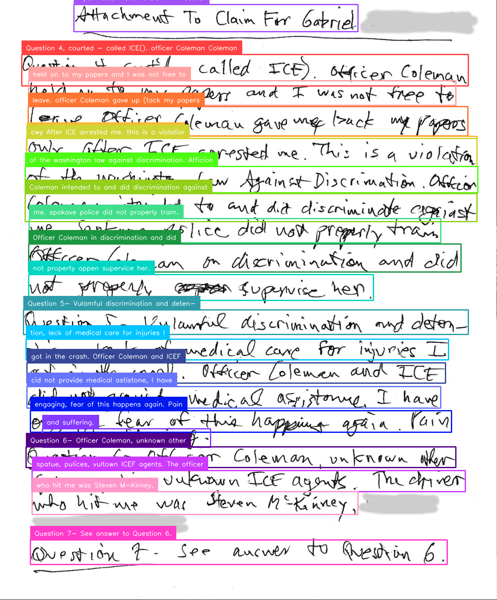

In [ ]:
import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/handwritten-text.jpg")
task = "<OCR_WITH_REGION>"

response = run_inference(image=image, task=task)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoundingBoxAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

In [ ]:
# @title Example `<OCR>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/handwritten-text.jpg")
task = "<OCR>"

response = run_inference(image=image, task=task)
response[task]

'Attachment To Claim For GatrielQuestion 4, cortfd - called ICE). officer Coleman Colemanheld on to my papers and I was not free toleave. Officer Coleman gave up (tuck my papersowy after ICE arrest me. This is a violationof the washington law against discrimination. AfficiorColeman intended to and did not discrimination exceptiastme. spokave police did not properly tran.Officer Coleman in discrimination and dichot property appen supervice her.Question 5- Vulamful discrimination and deten-tion, lack of medical care for injuries Igot in the crash. OfficerColeman and ICEFCid not provide medical astistone, I haveengaging fear of this happiness again. Painand suffering.Question 6- Officer Coleman, unknown otherspatue, pulices, vultown ICE agents. The officerwho hit me was Steven M-kirney,Question 7- See answer to Question 6.'

    Task7: Referring Expression Segmentation
        It is a vision-language task where the model given an image and a
         natural language phrase, predicts a pixel-level segmentation mask that
          precisely marks the region described by the phrase.

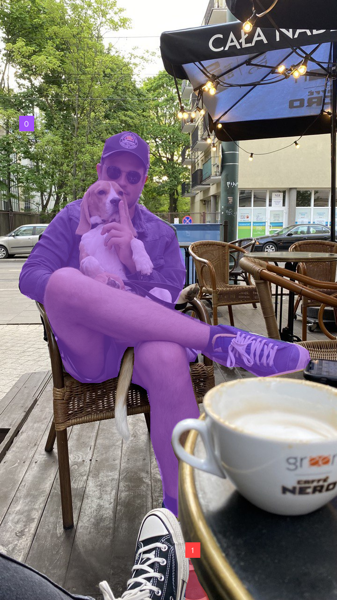

In [ ]:
# @title Example `<REFERRING_EXPRESSION_SEGMENTATION>` inference

import supervision as sv
from PIL import Image

image = Image.open(f"{HOME}/data/dog-3.jpeg")
task = "<REFERRING_EXPRESSION_SEGMENTATION>"
text = "man"

response = run_inference(image=image, task=task, text=text)
detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX)

image = mask_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
image.thumbnail((600, 600))
image

📚 Formula Insight:

    While Florence doesn't require us to define CNN/Attention manually, here's how it relates:
        1. Image -> Encoder (CNN/ViT) -> Feature vector (like in Encoder-Decoder)
        2. Text Prompt + Feature -> Decoder (Transformer) -> Output sequence
        Attention helps focus on important spatial regions (same concept as image attention)



    Example decoder formula:
        Attention(Q, K, V) = softmax((QK^T) / sqrt(d_k)) * V
        Here, Q: Query (from decoder), K/V: Keys/Values (from encoder)
    Florence uses similar multi-head attention inside the decoder to relate prompt with image regions

---

## 🔗 **The Link Between Transformers, CNNs, and Attention**

---

### 🔧 1. **CNN (Convolutional Neural Network)**

- **What it is**: A model designed to extract **local features** from images using **convolutional filters**.
- **Strength**: Great at recognizing **spatial patterns** (e.g., edges, textures, objects).
- **Limitation**: Has a **limited receptive field** — only looks at a **local neighborhood** unless stacked deeply.

---

### 🧠 2. **Attention Mechanism**

- **What it is**: A method that allows a model to **focus on important parts** of the input — inspired by how humans pay attention.
- **In images**: Can be used to focus on specific **regions** while generating a caption or doing detection.
- **Mathematical Idea**: Weighted sum of inputs, where weights are **learned based on importance**.

> 📌 Attention = Think “where to look” + “how much to look”

---

### ⚡ 3. **Transformer**

- **What it is**: A model architecture based **entirely on attention**, originally for NLP.
- **Key idea**: Every token (or image patch) can **attend to every other** — full context, not just local.
- **Components**:
  - **Self-attention**
  - **Feedforward layers**
  - **Layer norm + residual connections**

> ✔️ Transformers **replace convolution** with **global attention**.

---

## 🔁 **How Are They Linked?**

| Concept | Role | How They Connect |
|--------|------|------------------|
| **CNN** | Feature extractor | Detects **local patterns** |
| **Attention** | Focus mechanism | Lets models **prioritize** key parts of data |
| **Transformer** | Full model | Built using **layers of attention**, can **replace CNNs** in many tasks |

---

## 🔄 CNN vs Transformer

| Property | CNN | Transformer |
|----------|-----|-------------|
| Focus | Local | Global |
| Sequence Awareness | ❌ | ✅ |
| Positional Info | Implicit (through structure) | Must be added explicitly |
| Task Usage | Classification, detection | Captioning, grounding, segmentation, VQA, etc. |

---

## ✅ Final Takeaway for Students:

> - CNNs are **good at local feature extraction** using filters.
> - Attention helps models **focus** on the most important parts of data — useful in both CNNs and Transformers.
> - Transformers are **entirely built using attention**, enabling **global reasoning** across an image or sequence.
> - Modern vision models like **Florence 2** and **ViTs** are **based on Transformers**, but inspired by how CNNs process images.

---